Name: Johan Renish
Reg No:212225040159
MODEL COEFFICIENTS:
enginesize:4523.404901011966
horsepower:1694.2232554525806
citympg:-392.5731841571549
highwaympg:-816.3577991826088
Intercept:13223.414634146342

MODEL PERFORMANCE:
MSE:16471505.900042146
RMSE:4058.5103055237087
R-squared:0.7913520781370976


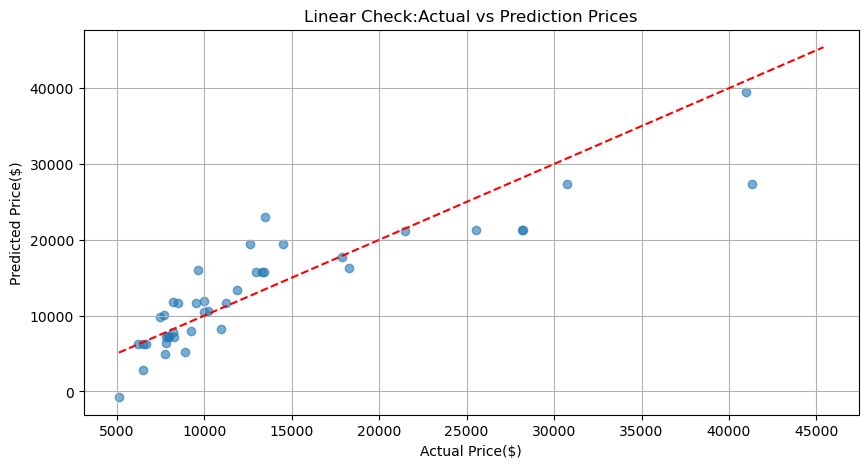


Durbin-Watson StatisticL 2.28 
(values close to 2 indicicate no autocorrelation)


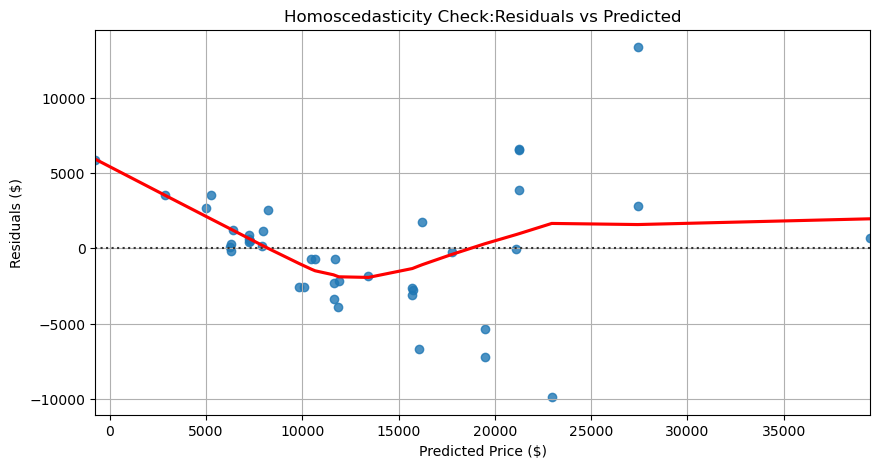

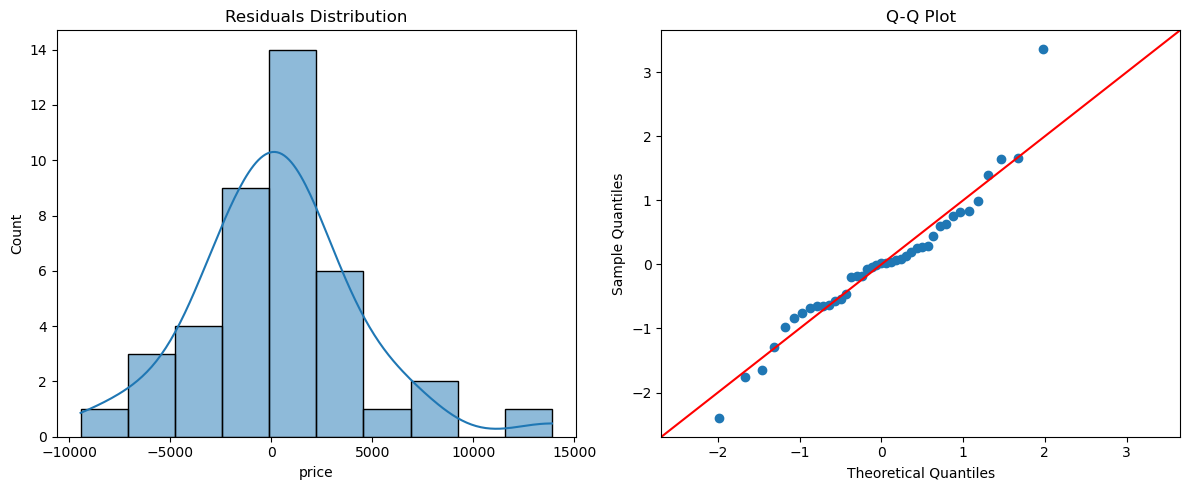

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()
x = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Name: Johan Renish')
print('Reg No:212225040159')
print("MODEL COEFFICIENTS:")
for feature,coef in zip(x.columns,model.coef_):
    print(f"{feature:}:{coef:}")
print(f"{'Intercept':}:{model.intercept_:}")
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':}:{mean_squared_error(y_test,y_pred):}")
print(f"{'RMSE':}:{np.sqrt(mean_squared_error(y_test,y_pred)):}")
print(f"{'R-squared':}:{r2_score(y_test,y_pred):}")
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("Linear Check:Actual vs Prediction Prices")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.grid(True)
plt.show()
residuals =y_test-y_pred
dw_test =sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson StatisticL {dw_test:.2f}","\n(values close to 2 indicicate no autocorrelation)")
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.title("Homoscedasticity Check:Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()